In [43]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import time
import random

# VISUALIZATION
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# PREPROCESSING
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# STATISTICAL TESTS
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

# MODELING AND EVALUATION
from sklearn import metrics

import dataframe_image as dfi


import warnings
warnings.filterwarnings('ignore')

In [4]:
print(stats.chisquare([180,215,205], f_exp = [200,200,200]))

Power_divergenceResult(statistic=3.25, pvalue=0.19691167520419406)


In [5]:
data = pd.read_csv("Customer_Churn_Telecom.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df = data[['customerID', 'StreamingTV', 'Churn']]
df.head()

,customerID,StreamingTV,Churn
0,7590-VHVEG,No,No
1,5575-GNVDE,No,No
2,3668-QPYBK,No,Yes
3,7795-CFOCW,No,No
4,9237-HQITU,No,Yes


In [ ]:
df['StreamingTV'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [8]:
df.head()

,customerID,StreamingTV,Churn
0,7590-VHVEG,No,No
1,5575-GNVDE,No,No
2,3668-QPYBK,No,Yes
3,7795-CFOCW,No,No
4,9237-HQITU,No,Yes


In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [11]:
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 7043 rows and 21 columns.


In [12]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [30]:
char_not_num = data[['TotalCharges']][~data['TotalCharges'].str.contains('[1-9.]')]
char_not_num

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [21]:
data['TotalCharges'].isnull().sum()

0

In [31]:
print('There are {} rows that were found to have a special character.'.format(len(char_not_num)))

There are 11 rows that were found to have a special character.


In [34]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan).astype(float)
data = data[pd.notnull(data['TotalCharges'])].reset_index().drop('index', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [35]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

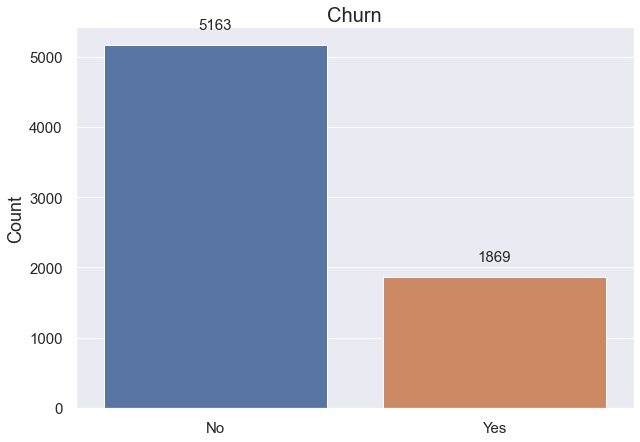

In [52]:
# create a bar plot based on frequency

plt.figure()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.set(rc={'figure.figsize':(10,7)})
cplot = sns.countplot(x="Churn", data=data)
for p in cplot.patches:
         cplot.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')
cplot.axes.set_title("Churn",fontsize=20)
cplot.set_xlabel("", fontsize=18)
cplot.set_ylabel("Count", fontsize=18)

#save image
plt.savefig('barplot_churn.png')

In [53]:
# this function creates a barplot given the data and the categorical feature against the Churns
def plot_categorical(data, feature, rotate=0, y_axis="percentage of customers", title=None):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=rotate)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)

    graph_data = data.groupby(feature)["Churn"].value_counts().to_frame()
    graph_data = graph_data.rename({"Churn": y_axis}, axis=1).reset_index()
    graph_data[y_axis] = graph_data[y_axis]/len(data)
    bar = sns.barplot(x=feature, y= y_axis, hue='Churn', data=graph_data)
#     bar.set_xticklabels(['{:,.0%}'.format(x) for x in bar.get_xticks()])
    bar.set_yticklabels(['{:,.0%}'.format(x) for x in bar.get_yticks()])
    
    for p in bar.patches:
             bar.annotate("%.2f" % (p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, xytext=(0, 20),
                 textcoords='offset points')

    bar.axes.set_title(title,fontsize=20)
    bar.set_xlabel("")
    bar.set_ylabel(y_axis, fontsize=18)
    bar.plot()
    plt.savefig('bar.pdf')

In [54]:
# create a table showing values per churn

def show_crosstab(data, feature):
    orange = sns.light_palette("orange", as_cmap=True)
    tab = pd.crosstab(data[feature],data['Churn'], margins=True).style.set_table_attributes('style="font-size: 15px"')
    return tab

In [55]:
excluded_features = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = data.drop(excluded_features, axis=1)
cat_features.columns

Index(['gender',
       'SeniorCitizen',
       'Partner',
       'Dependents',
       'PhoneService',
       'MultipleLines',
       'InternetService',
       'OnlineSecurity',
       'OnlineBackup',
       'DeviceProtection',
       'TechSupport',
       'StreamingTV',
       'StreamingMovies',
       'Contract',
       'PaperlessBilling',
       'PaymentMethod',
       'Churn'],
      dtype='object')

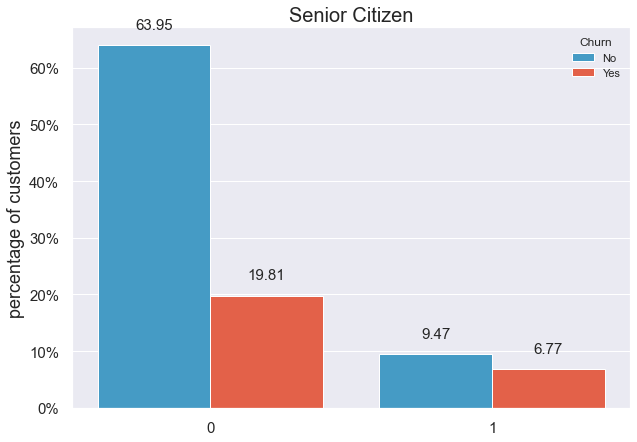

In [59]:
plot_categorical(data=data, feature='SeniorCitizen', title='Senior Citizen')

In [57]:
show_crosstab(data, 'SeniorCitizen')

Churn,No,Yes,All
SeniorCitizen,,,
0,4497,1393,5890
1,666,476,1142
All,5163,1869,7032


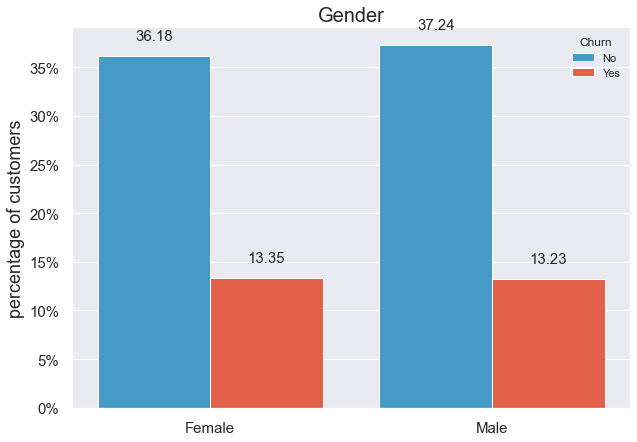

In [58]:
plot_categorical(data=cat_features, feature='gender', title='Gender')

In [60]:
show_crosstab(data, 'gender')

Churn,No,Yes,All
gender,,,
Female,2544,939,3483
Male,2619,930,3549
All,5163,1869,7032


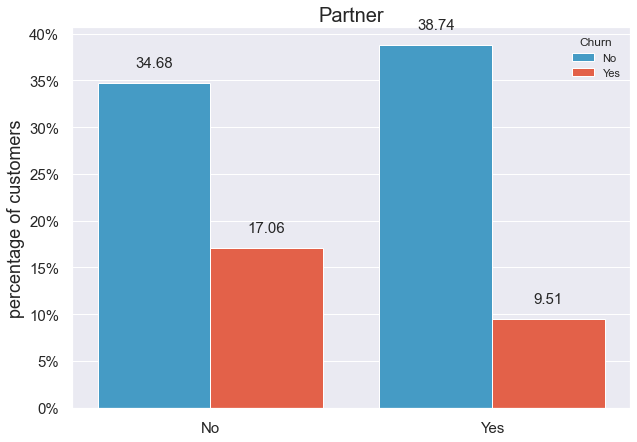

In [61]:
plot_categorical(data=cat_features, feature='Partner', title='Partner')

In [62]:
show_crosstab(data, 'Partner')

Churn,No,Yes,All
Partner,,,
No,2439,1200,3639
Yes,2724,669,3393
All,5163,1869,7032


In [63]:
# create a density plot sshowing diference between churn groups
def plot_numerical(data, feature, title=None):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=0)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)
    plot = sns.distplot(data[feature][data['Churn']=='No'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
    plot = sns.distplot(data[feature][data['Churn']=='Yes'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1})
    plot.axes.set_title(title,fontsize=20)
    plot.set_xlabel("")
    plot.set_ylabel('density', fontsize=18)
    plot.legend(labels=['No','Yes'], title='Churn')
    plot.plot()
    plt.savefig('bar.pdf')

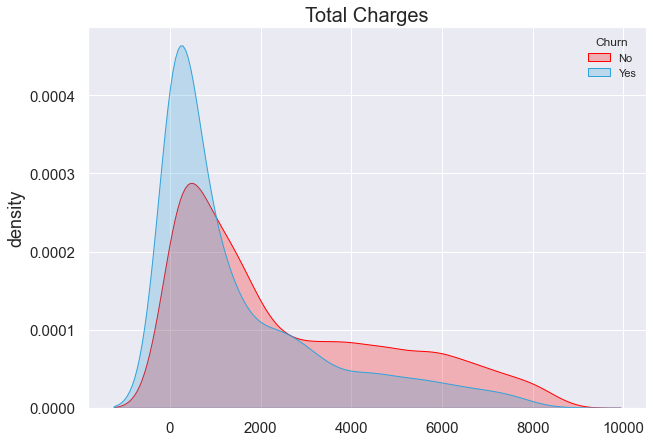

In [64]:
plot_numerical(data=data, feature='TotalCharges', title='Total Charges')

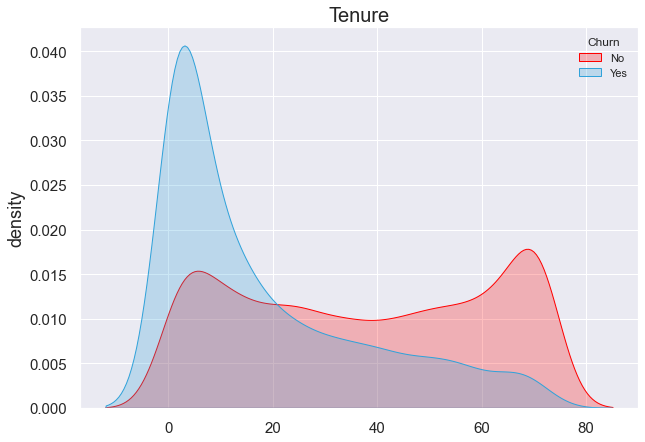

In [65]:
plot_numerical(data=data, feature='tenure', title='Tenure')

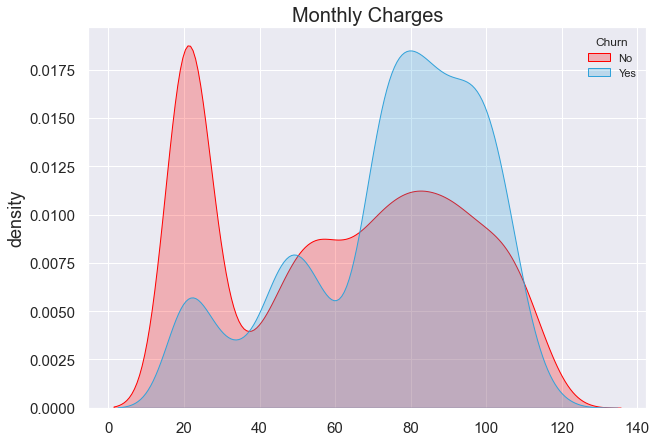

In [66]:
plot_numerical(data=data, feature='MonthlyCharges', title='Monthly Charges')

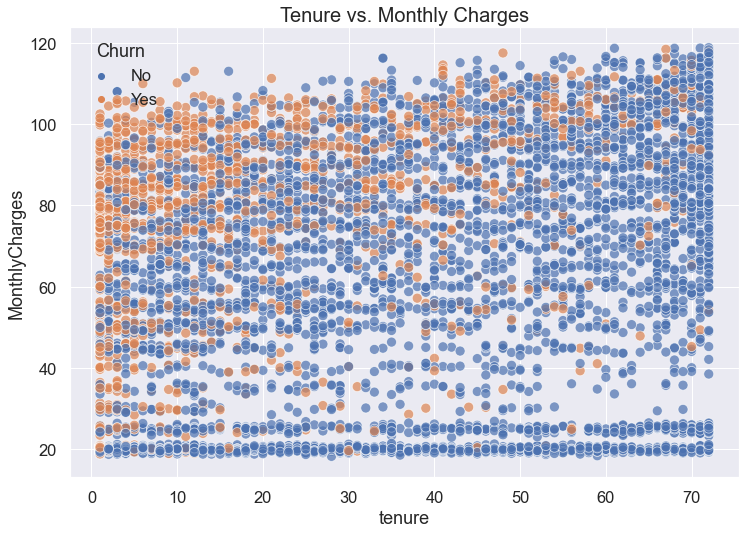

In [67]:
# this function creates scatterplot with churn groups as hue 
def plot_pair(data, x_feature, y_feature, title=None):
    sns.set(rc={'figure.figsize':(12,8.27)})
    sns.set(font_scale = 1.5)
    scatter = sns.scatterplot(x=x_feature, y=y_feature, data=data, hue='Churn', s=100, alpha=0.7)
    scatter.axes.set_title(title,fontsize=20)
    scatter.plot()

# create data for the scatter plot
scatter_data = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
plot_pair(scatter_data, 'tenure', 'MonthlyCharges', title='Tenure vs. Monthly Charges')